# Grade: /100 points

# Lab Assignment 01: Supervised learning, Linear models, and Loss functions

In this Lab assignment, you're going to write your own methods to fit a linear model using either an OLS or LAD cost function.  

## Data set 

For this assignment, we will examine some data representing possums in Australia and New Guinea. The data frame contains 46 observations on the following 6 variables:

* sex: Sex, either m (male) or f (female).
* age: Age in years.
* headL: Head length, in mm.
* skullW: Skull width, in mm.
* totalL: Total length, in cm.
* tailL: Tail length, in cm.

## Follow These Steps before submitting
Once you are finished, ensure to complete the following steps.

1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.

2.  Fix any errors which result from this.

3.  Repeat steps 1. and 2. until your notebook runs without errors.

4.  Submit your completed notebook to OWL by the deadline.


## Preliminaries

In [ ]:
# Import all the necessary packages: 
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import scipy.stats as ss 
import scipy.optimize as so
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm



## Part 1
### Question 1.1:  /10 points


Read in the `possum.csv` file as a `pandas.DataFrame`.  Investigate the relationship between the possum's age and it's tail length by plotting a scatter plot of the `age` and `tailL` columns. You might want to add an `alpha` in case some data are overlapping. 

In [ ]:
from google.colab import files
uploaded = files.upload()




possum_data = pd.read_csv("possum.csv")
possum_data.head()



Saving possum.csv to possum.csv


,sex,age,headL,skullW,totalL,tailL
0,m,8,94.1,60.4,89.0,36.0
1,f,6,92.5,57.6,91.5,36.5
2,f,6,94.0,60.0,95.5,39.0
3,f,6,93.2,57.1,92.0,38.0
4,f,2,91.5,56.3,85.5,36.0


In [ ]:
possum_data.head()

,sex,age,headL,skullW,totalL,tailL
0,m,8,94.1,60.4,89.0,36.0
1,f,6,92.5,57.6,91.5,36.5
2,f,6,94.0,60.0,95.5,39.0
3,f,6,93.2,57.1,92.0,38.0
4,f,2,91.5,56.3,85.5,36.0


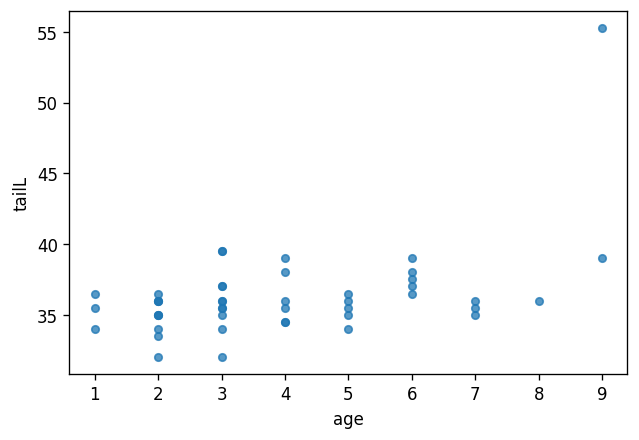

In [ ]:
fig, ax = plt.subplots(dpi = 120)
possum_data.plot.scatter(x = 'age', y = 'tailL', alpha = 0.75, ax = ax)

### Question 1.2: /5 point

Recall that the linear model, we obtain predictions by computing 

$$ \hat{\mathbf{y}} = \mathbf{X} \beta $$

Here, $\mathbf{X}$ is a design matrix which includes a column of ones, $\beta$ are coefficients, and $\mathbf{y}$ are outcomes.  Write a function `linearModelPredict` to compute linear model predictions given data and a coefficient vector.  The function should take as it's arguments a 1d-array of coefficients `b` and the design matrix `X` as a 2d-array and return linear model predictions `yp`.

Test the function by setting 

```
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
```
and call you function with these values! 

Report $\hat{\mathbf{y}}$. 
What is the dimensionality of the numpy-array that you get back? 

Hint:  Read the documentation for `np.dot` or the `@` operator in `numpy`.

In [ ]:
def linearModelPredict(b,X):
    yp = X@b
    return yp

### Question 1.3: /15 points

Write a function `linearModelLossRSS` which computes and returns the loss function for an OLS model parameterized by $\beta$, as well as the gradient of the loss.  The function should take as its first argument a 1d-array `beta` of coefficients for the linear model, as its second argument the design matrix `X` as a 2d-array, and as its third argument a 1d-array `y` of observed outcomes.

Test the function with the values 

```
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2]) 
```

Report RSS and gradient. 
Written answer: To minimize the cost do you need increase or decrease the value of the parameters? 

In [ ]:
def linearModelLossRSS(b,X,y):
    predY = linearModelPredict(b,X)
    res = y-predY
    residual_sum_of_squares = sum(res**2) 
    gradient=-2*(res @ X)
    return (residual_sum_of_squares, gradient)

Written answer: 

### Question 1.4:  /15 points. 

Now that you've implemented a loss function in question 3, it is now time to minimize it!

Write a function `linearModelFit` to fit a linear model.  The function should take as its first argument the design matrix `X` as a 2d-array, as its second argument a 1d-array `y` of outcomes, and as its third argument a function  `lossfcn` which returns as a tuple the value of the loss, as well as the gradient of the loss. As a result, it should return the estimated betas and the R2. 

Test the function with the values: 
```
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2]) 
```

Report best parameters and the fitted R2. 


In [ ]:
def linearModelFit(X,y,lossfcn = linearModelLossRSS):
    nrows,ncols = X.shape
    betas=np.zeros((ncols,1))
    RES = so.minimize(lossfcn,betas,args=(X,y),jac=True)
    estimated_betas=RES.x 
    res = y-np.mean(y)
    TSS = sum(res**2)
    RSS,deriv = linearModelLossRSS(estimated_betas,X,y)
    R2 = 1-RSS/TSS 
    return (estimated_betas,R2)


### Question 1.5: /15 points

Use the above functions to fit your model to the possum data. Then use your model and the fitted parameters to make predictions along a grid of equally spaced possum ages.  

Plot the data and add a line for the predicted values. You can get these by generating a new X-matrix with equally space ages (using for example np.linspace). Also report the R2 value for the fit. 



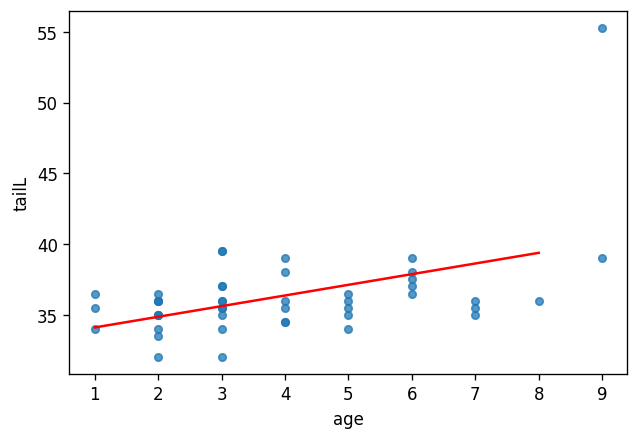

In [ ]:
# Make the design matrix using np.c_ 
# y = ...
# X =  np.c_[...]
# Call you fitting function 

# Create the scatter plot (see question 1.1)

# Create a new X matrix with equally space data 

# Add the line to the graph 

fig, ax = plt.subplots(dpi = 120)
possum_data.plot.scatter(x = 'age', 
                         y = 'tailL', 
                         alpha = 0.75,
                         ax = ax)

y = possum_data.tailL.values
age = possum_data.age.values
N = age.size
X = np.c_[np.ones(N), age]
actual_betas, actual_R2 = linearModelFit(X,y)

age_grid = np.arange(age.min(), age.max())
Xn = np.c_[np.ones(age_grid.size), age_grid]
yn = Xn@actual_betas

ax.plot(age_grid, yn, color = 'red')
# Report R2 

## Part 2: LAD Regression

### Question 2.1:  /15 points

In the previous section, we worked with the squared loss.  Now, we'll implement a linear model with least absolute deviation loss.

Write a function `linearModelLossLAD` which computes the least absolute deviation loss function for a linear model  parameterized by $\beta$, as well as the gradient of the loss.  The function should take as its first argument a 1d-array `beta` of coefficients for the linear model, as its second argument the design matrix `X` as a 2d-array, and as its third argument a 1d-array `y` of observed outcomes.

Test the function with the values 

```
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2]) 
```

Report RSS and gradient. 

In [ ]:
def linearModelLossLAD(b,X,y):
    predY = linearModelPredict(b,X)
    res = y-predY
    sres = np.sign(res); 
    sum_abs_dev = sum(abs(res))
    grad =- (sres @ X)
    return (sum_abs_dev,grad)

### Question 2.2: /10 points


Use the above functions to fit your LAD model. Use your model to make predictions along a grid of equally spaced possum ages.  Once fit, the code below will plot the fit.  The code will also print the R squared value on the plot.

Written answer: What is the difference in the fit obtained with an L1 as compared to the L2 cost function? Which one has a higher R2 value? Why?  

Note: If you recieve an error from the optimizer, it may be because the loss function for the LAD model is not differentiable at its minimum.  This will lead to some gradient based optimiers to fail to converge.  If this happens to you then pass `method="Powell"` to `scipy.optimize.minimize`.



In [ ]:
age = possum_data.age.values
X = np.c_[np.ones(age.size), age]
y = possum_data.tailL.values
b,R2 = linearModelFit(X,y,lossfcn=linearModelLossLAD)

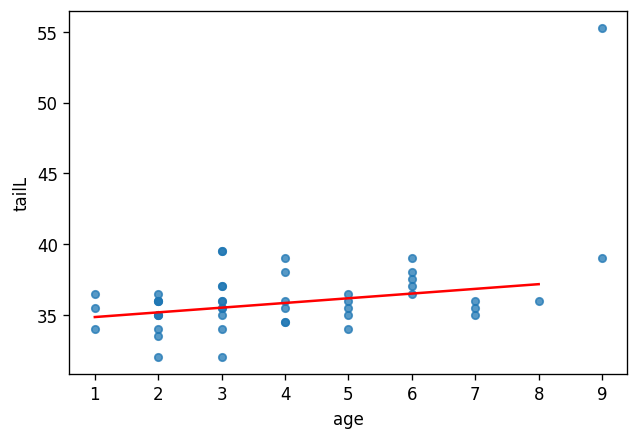

In [ ]:
fig, ax = plt.subplots(dpi = 120)
possum_data.plot.scatter(x = 'age', 
                         y = 'tailL', 
                         alpha = 0.75,
                         ax = ax)

y = possum_data.tailL.values
age = possum_data.age.values
N = age.size
X = np.c_[np.ones(N), age]
actual_betas, actual_R2 = linearModelFit(X,y, lossfcn = linearModelLossLAD)

age_grid = np.arange(age.min(), age.max())
Xn = np.c_[np.ones(age_grid.size), age_grid]
yn = Xn@actual_betas

ax.plot(age_grid, yn, color = 'red')

### Question 2.3: /15 points

Fit both an OLS model and a LAD model with `statsmodels`.  In no more than two sentences, comment on the rsquared values from `statsmodels` and the rsquared values from your models. Are they similar?

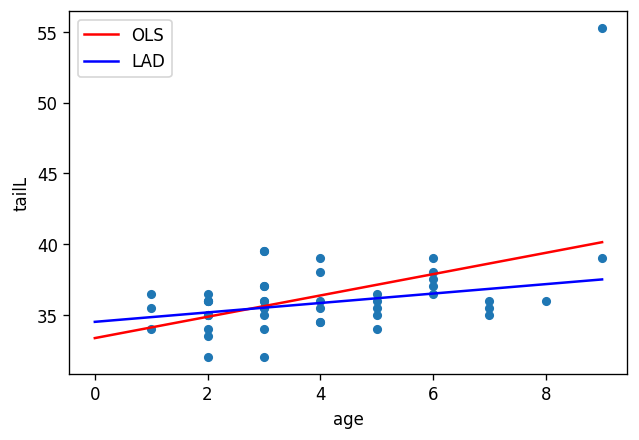

In [ ]:
ols_fit = smf.ols('tailL~age', data = possum_data).fit()
sad_fit = smf.quantreg('tailL~age', data = possum_data).fit(q = 0.5)

fig, ax = plt.subplots(dpi = 120)
possum_data.plot.scatter(x = 'age', y ='tailL', ax = ax)

age = np.linspace(0,9,101)
y_ols = ols_fit.predict(exog = dict(age = age)).values
y_sad = sad_fit.predict(exog = dict(age = age)).values

ax.plot(age, y_ols, color = 'red', label = 'OLS')
ax.plot(age, y_sad, color = 'blue', label = 'LAD')
ax.legend()



The differences:

As we can see in the plot in which all of the four models (OLS, LAD, OLS by statsmodels, LAD by statsmodels) are plotted, the models of "OLS" and "OLS by statsmodels" are almost the same:

OLS b0: 33.35046603 b1: 0.75372837

OLS by statsmodels b0: 33.35046605 b1: 0.75372836

The same things is visible about "LAD" and "LAD by statsmodels" plots. They are almost the same as we can see:

LAD b0: 34.50470793 b1: 0.33291433

LAD by statsmodels b0: 34.5000 b1:0.3333

-The value of b0 (constant coefficient) is almost the same between all of the models (OLS_b0: 33 and LAD_b0: 34) -On the other hand, the value of b1 (x1 coefficient) is different between OLS models (0.75) and LAD models (0.33). There is a data point which is outlier. When we are using OLS model, this outlier can affect the model more than LAD model and that's why the value of x1 coefficient is different between OLS and LAD models . Also, the value of R2 (pseudo R2) for LAD models is almost zero (0.03058) which is great. For OLS model, the value of R2 is 0.2228658794760413 which is good, but not as good as OL